In [14]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score ,f1_score,roc_curve
import nltk
from sklearn.model_selection import GridSearchCV
nltk.download('wordnet')
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package wordnet to /Users/nathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
%load_ext autoreload
%autoreload 2
from data_prep import df_prep  
from data_prep import vectorize_df
from model_src import model_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'vectorize_df' from 'data_prep' (/Users/nathan/Desktop/Amazon/Amazon_Books/data_prep.py)

In [ ]:
col_names = ['marketplace','customer_id','review_id','product_id','product_parent','product_title','product_category','star_rating','helpful_votes','total_votes','vine','verified_purchase','review_headline','review_body','review_date']
cols = {}
for i in range(len(col_names)):
    print (str(i)+': '+col_names[i])
    cols[col_names[i]] = i

In [4]:
np.random.seed(500)
df = pd.read_csv('data/sample_02.csv')
#df = df[df['7']==1]
len(df)
#df = df.sample(frac=.5, random_state=1)

62467

In [23]:
Corpus = df_prep(df,.5,.0)

0
1000
2000
3000
4000


In [24]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus[['text_final','help_score','help_votes','stars']],Corpus['label'],test_size=0.3)




In [44]:
Train_X_Vector, Test_X_Vector, Train_Y, Test_Y = vectorize_df(Train_X['text_final'], Test_X['text_final'], Train_Y, Test_Y,'TF_IDF')

[nltk_data] Downloading package wordnet to /Users/nathan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
SVC_model = model_fit(Train_X_Vector,Train_Y,'Naive_Bayes')

In [49]:
predictions_SVM = SVC_model.predict_proba(Test_X_Vector)

In [50]:
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [29]:
sum(Test_Y) / len(Test_Y)

0.5066568047337278

In [30]:
predictions_SVM

array([0, 0, 1, ..., 0, 1, 1])

In [31]:
Test_X['preds'] = predictions_SVM
Test_X['actual'] = Test_Y

In [32]:
Test_X['correct'] = Test_X['preds'] == Test_X['actual']

In [33]:
Test_X['correct']

9160      True
29003     True
16105    False
55405    False
53706    False
         ...  
3079      True
51363    False
11375     True
50493     True
19562    False
Name: correct, Length: 1352, dtype: bool

/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([1.01331361, 0.85798817, 1.07248521, 0.91715976, 1.07248521,
        0.82840237, 0.94674556, 0.93934911, 0.90236686, 1.44970414]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

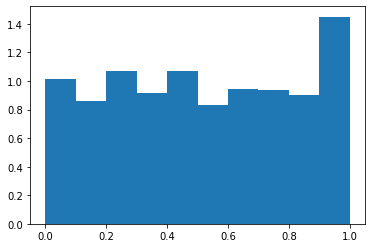

In [34]:
plt.hist(Test_X['help_score'],bins=10,normed=True)

/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([1.50980392, 1.21568627, 1.7254902 , 1.37254902, 1.76470588,
        0.66666667, 0.56862745, 0.37254902, 0.31372549, 0.49019608]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

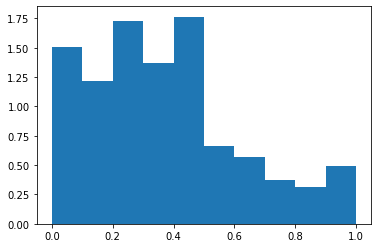

In [35]:
plt.hist(Test_X[Test_X['correct']==False]['help_score'],bins=10,normed=True)

In [5]:
plt.hist(Test_X['help_score'])

NameError: name 'Test_X' is not defined

In [6]:
df['help_score'] = df['8']/df['9']

/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

(array([0.4985469 , 0.08299128, 0.16688139, 0.21631663, 0.15609551,
        0.84998652, 0.64355694, 0.7256494 , 1.30868562, 5.35128981]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

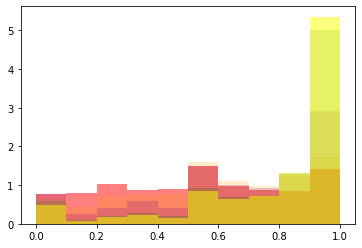

In [7]:
df_stars = []
for i in range(1,6):
    df_stars.append(df[df['7']==i])
    
plt.hist(df_stars[0]['help_score'],alpha=.5,color = 'red',normed=True)
plt.hist(df_stars[1]['help_score'],alpha=.2,color = 'orange',normed=True)
plt.hist(df_stars[2]['help_score'],alpha=.2,color = 'purple',normed=True)
plt.hist(df_stars[3]['help_score'],alpha=.2,color = 'green',normed=True)
plt.hist(df_stars[4]['help_score'],alpha=.5,color = 'yellow',normed=True)

/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text yticklabel objects>)

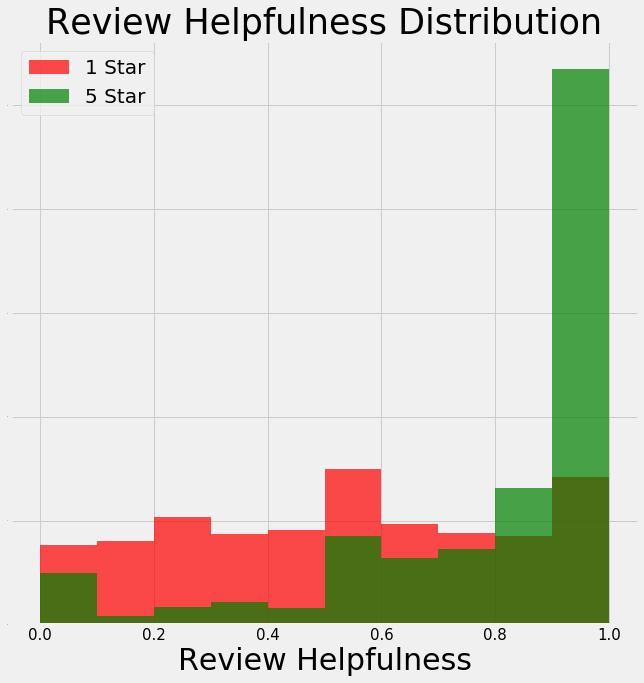

In [25]:
plt.figure(figsize=(10,10))
plt.hist(df_stars[0]['help_score'],alpha=.7,color = 'red',normed=True,label='1 Star')
plt.hist(df_stars[4]['help_score'],alpha=.7,color = 'green',normed=True,label='5 Star')
plt.title('Review Helpfulness Distribution',fontsize=35)
plt.xlabel('Review Helpfulness',fontsize=30)
plt.legend(prop={'size': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=0)

/Users/nathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([0., 1., 2., 3., 4., 5.]), <a list of 6 Text yticklabel objects>)

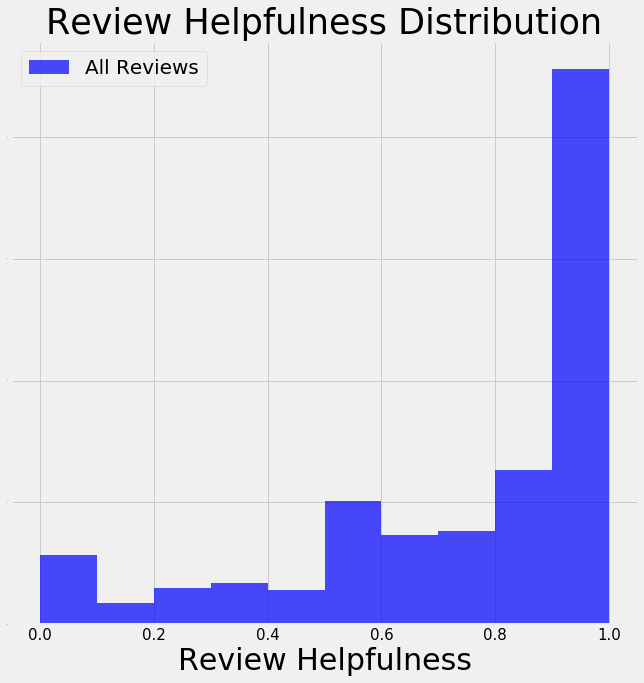

In [26]:
plt.figure(figsize=(10,10))
plt.hist(df['help_score'],alpha=.7,color = 'blue',normed=True,label='All Reviews')
plt.title('Review Helpfulness Distribution',fontsize=35)
plt.xlabel('Review Helpfulness',fontsize=30)
plt.legend(prop={'size': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=0)